In [1]:
import pandas
pandas.__version__

'0.23.4'

In [2]:
import matplotlib.pyplot as plt

In [3]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [4]:
import glob

In [5]:
import os.path




Interest was expressed regarding the following viruses.



```BASH


ll /raid/refs/fasta/virii/NC_00{0898.1,1664.4,1710.1,1716.2,8168.1}.fasta 
-r--r--r-- 1 jake 164481 Nov 15 17:59 /raid/refs/fasta/virii/NC_000898.1.fasta
-r--r--r-- 1 jake 161747 Nov 15 17:59 /raid/refs/fasta/virii/NC_001664.4.fasta
-rw-rw-r-- 1 jake   9586 Dec 12 13:12 /raid/refs/fasta/virii/NC_001710.1.fasta
-r--r--r-- 1 jake 155317 Nov 15 17:46 /raid/refs/fasta/virii/NC_001716.2.fasta
-rw-rw-r-- 1 jake 106274 Dec 12 13:16 /raid/refs/fasta/virii/NC_008168.1.fasta

head -1 /raid/refs/fasta/virii/NC_00{0898.1,1664.4,1710.1,1716.2,8168.1}.fasta 
==> /raid/refs/fasta/virii/NC_000898.1.fasta <==
>NC_000898.1 Human herpesvirus 6B, complete genome

==> /raid/refs/fasta/virii/NC_001664.4.fasta <==
>NC_001664.4 Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102

==> /raid/refs/fasta/virii/NC_001710.1.fasta <==
>NC_001710.1 GB virus C/Hepatitis G virus, complete genome

==> /raid/refs/fasta/virii/NC_001716.2.fasta <==
>NC_001716.2 Human herpesvirus 7, complete genome

==> /raid/refs/fasta/virii/NC_008168.1.fasta <==
>NC_008168.1 Choristoneura fumiferana granulovirus, complete genome


```



I aligned ALL 956 pairs of fastq files to each virus, selecting only those reads that aligned, creating a single unsorted bam file. 
I then sorted and indexed this file, ultimately extracting the coverage depth, which is plotted in the next step.



```BASH


for virus in NC_001710.1 NC_001716.2 NC_001664.4 NC_000898.1 ; do
    bowtie2 --threads 35 --xeq -x virii/${virus} --very-sensitive -1 $( ls /raid/data/raw/USC-CHLA-NBL/2018????/*.R1.fastq.gz | paste -sd ',' ) -2 $( ls /raid/data/raw/USC-CHLA-NBL/2018????/*.R2.fastq.gz | paste -sd ',' ) 2>> ${virus}.log | samtools view -F 4 -o ${virus}.unsorted.bam -
    samtools sort -o ${virus}.bam ${virus}.unsorted.bam
    samtools index ${virus}.bam
    samtools depth ${virus}.bam > ${virus}.depth.csv
done


```





In [6]:
for filepath in glob.iglob('/Users/jakewendt/20181212-USC-CHLA-NBL-unmapped-viral-align/NC*.depth.csv'):
    print(filepath)

/Users/jakewendt/20181212-USC-CHLA-NBL-unmapped-viral-align/NC_001716.2.depth.csv
/Users/jakewendt/20181212-USC-CHLA-NBL-unmapped-viral-align/NC_001664.4.depth.csv
/Users/jakewendt/20181212-USC-CHLA-NBL-unmapped-viral-align/NC_000898.1.depth.csv
/Users/jakewendt/20181212-USC-CHLA-NBL-unmapped-viral-align/NC_008168.1.depth.csv
/Users/jakewendt/20181212-USC-CHLA-NBL-unmapped-viral-align/NC_001710.1.depth.csv


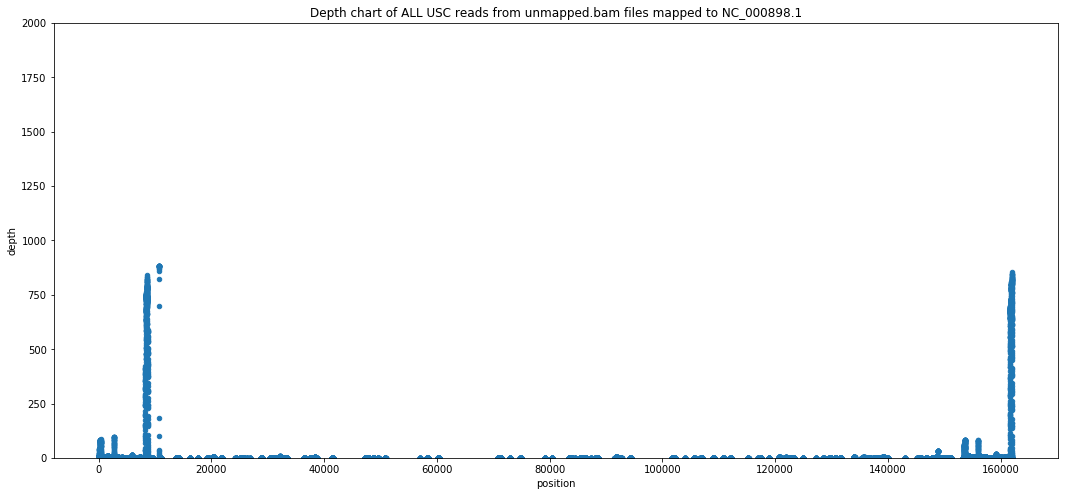

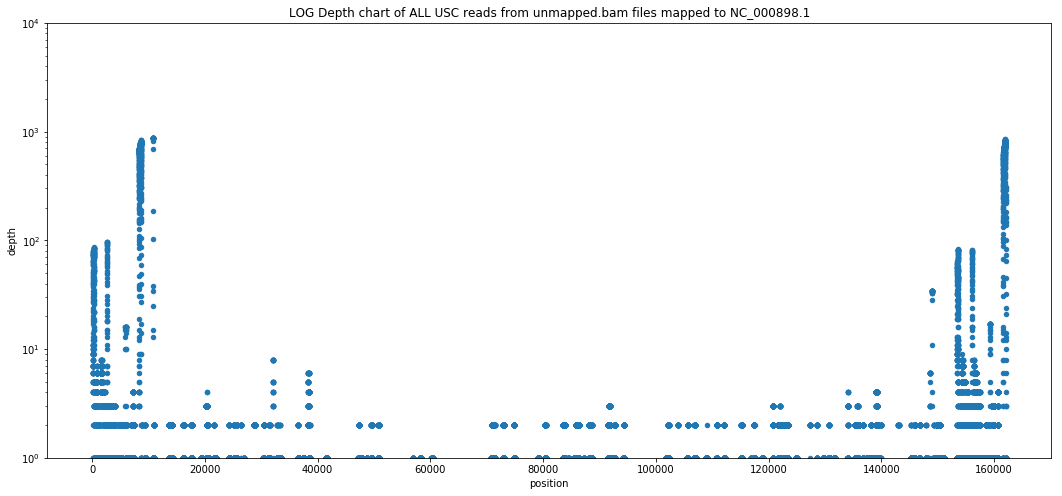

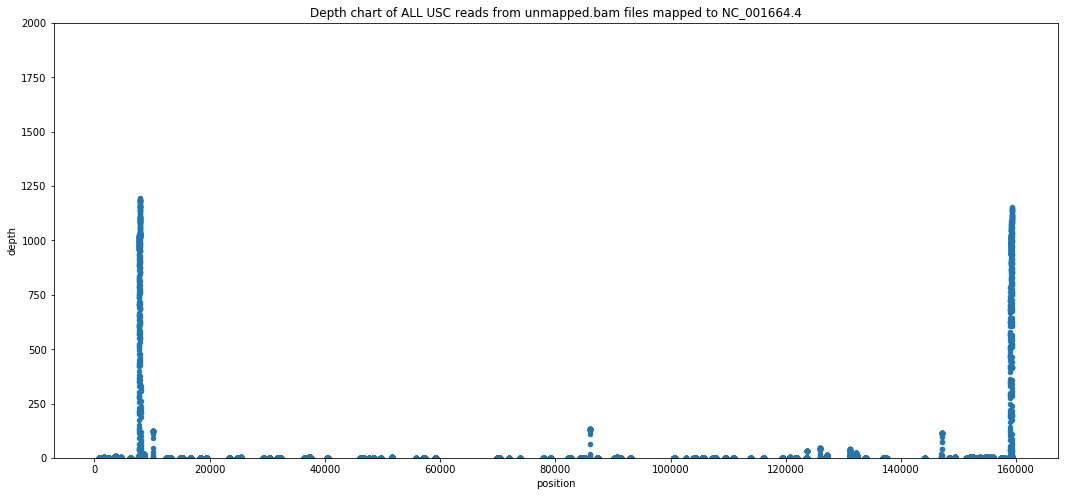

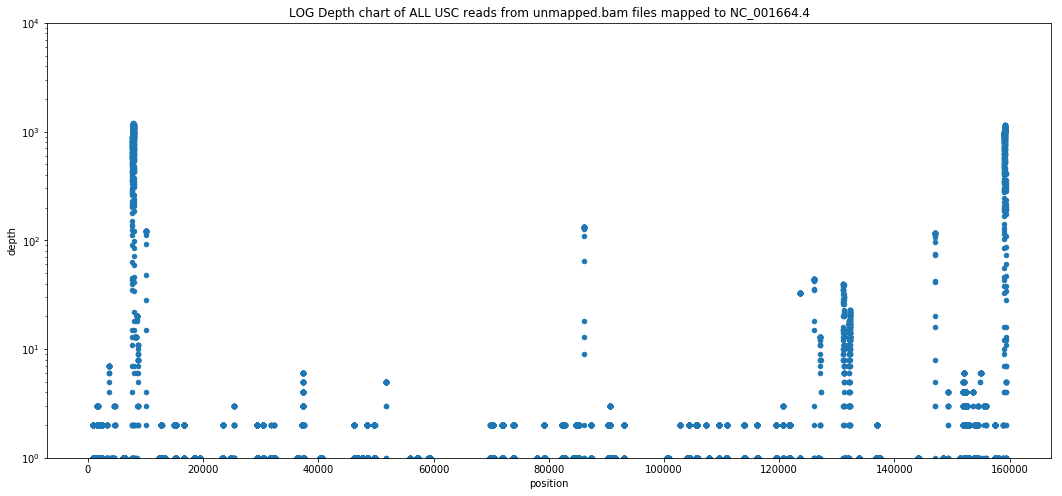

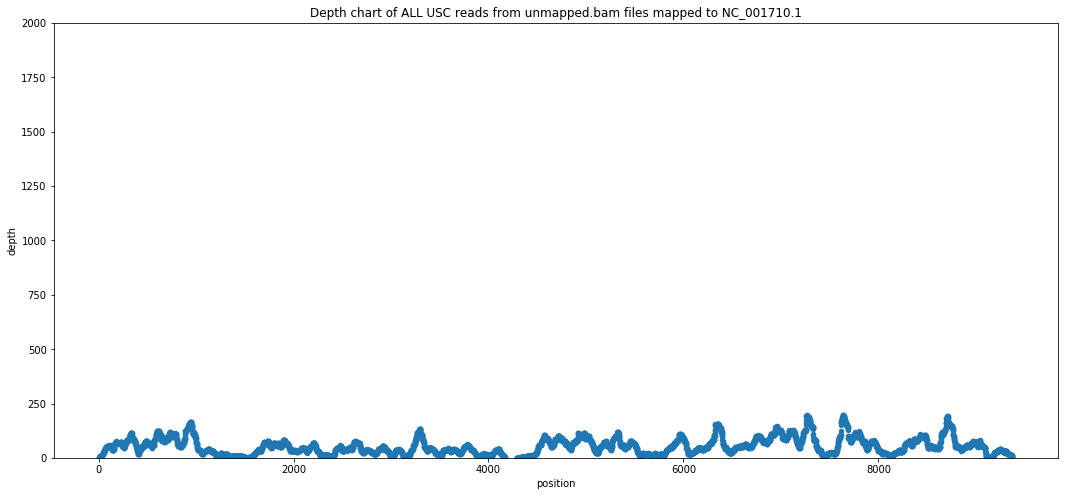

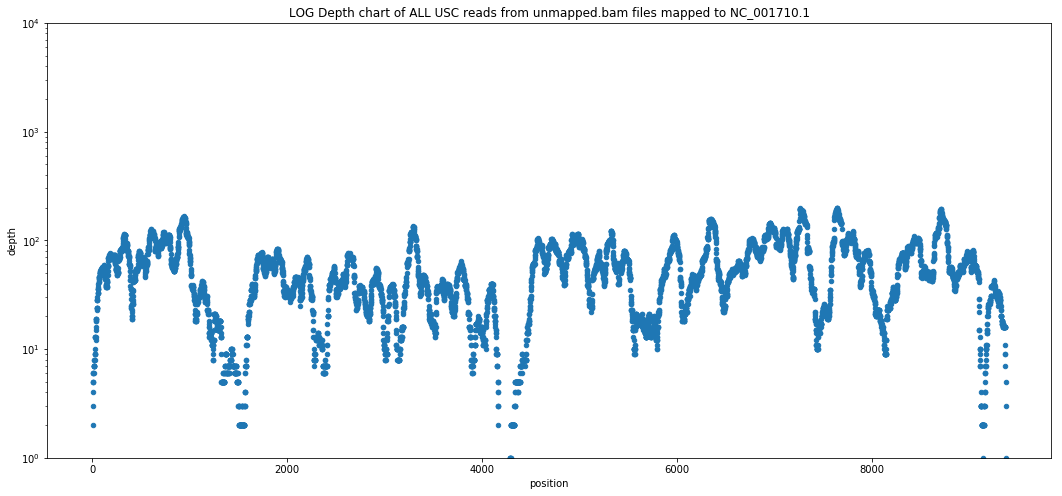

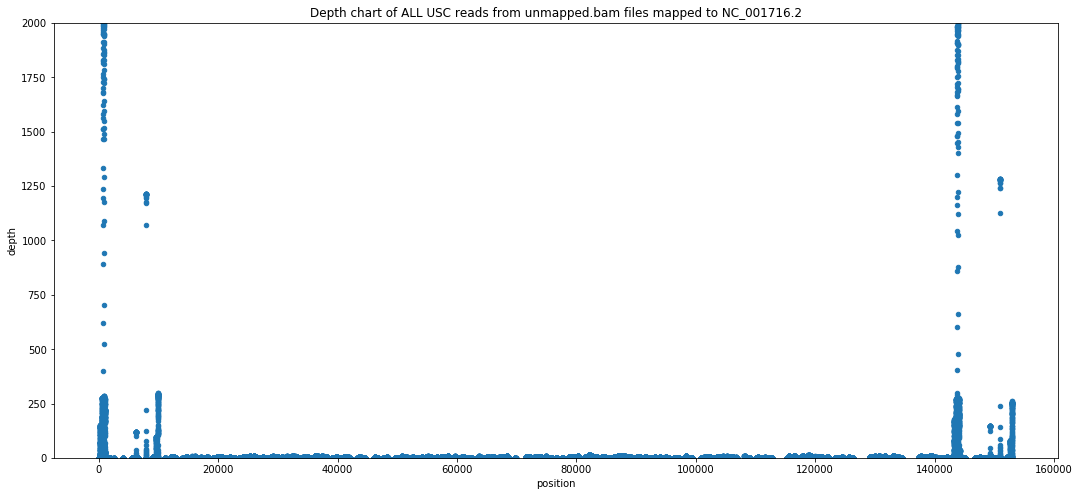

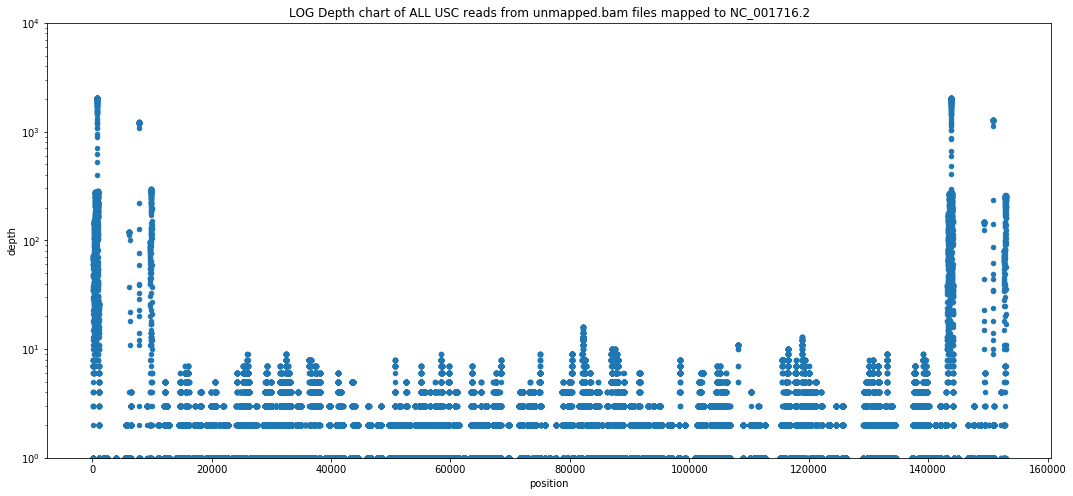

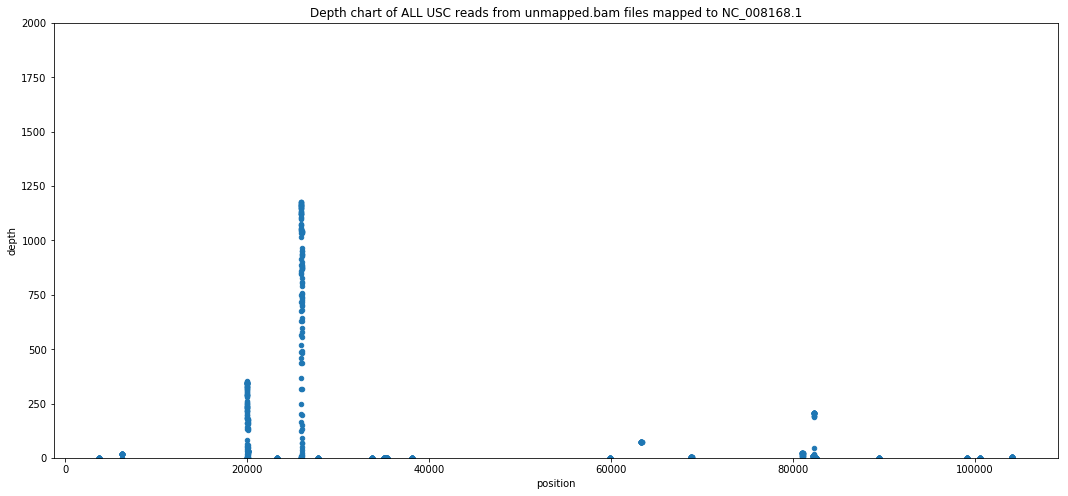

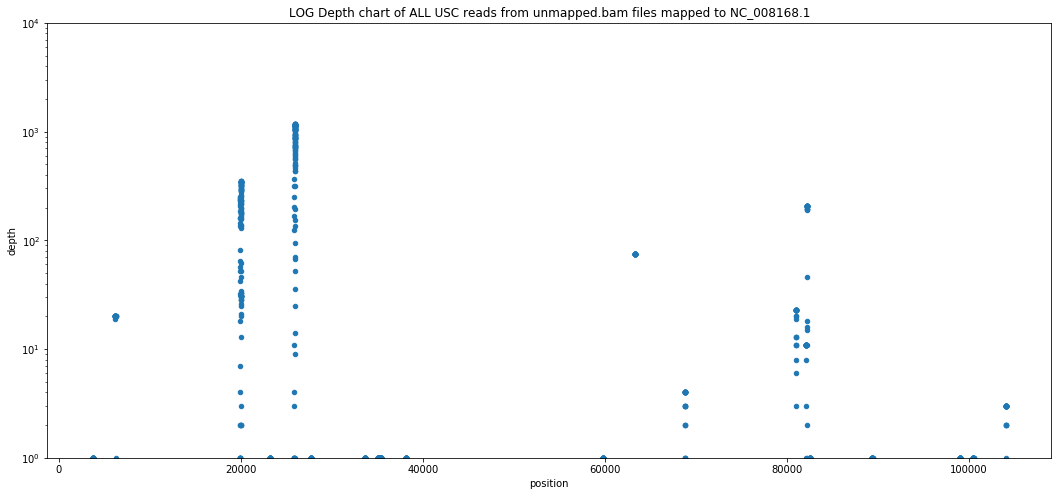

In [7]:
virii="NC_000898.1 NC_001664.4 NC_001710.1 NC_001716.2 NC_008168.1".split()
#virii="NC_001664.4 NC_001710.1 NC_001716.2".split()

for virus in virii:
    filename="/Users/jakewendt/20181212-USC-CHLA-NBL-unmapped-viral-align/"+virus+".depth.csv"
    #print(filename)
    if os.path.isfile(filename): 
        d = pandas.read_csv(filename,
            sep="\t",
            header=None,
            usecols=[1,2],
            names=["position","depth"],
            index_col="position")

        d.fillna(0).reset_index().plot(
                title="Depth chart of ALL USC reads from unmapped.bam files mapped to "+virus,
                logy=False,kind='scatter',x='position',y='depth',ylim=[1,2000])

        d.fillna(0).reset_index().plot(
                title="LOG Depth chart of ALL USC reads from unmapped.bam files mapped to "+virus,
                logy=True,kind='scatter',x='position',y='depth',ylim=[1,10000])



As seen in previous studies in mapping unmapped data to HHV6, there are a couple regions at the ends of the genome that map highly to HHV6a, HHV6b and HHV7.

Granulovirus maps a little more sparsely, whilst GBC maps a lot more evenly.

